# Covid-19 Data Analysis and Visualization

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
covid_df = pd.read_csv('full_grouped.csv')

In [18]:
 covid_df.drop(columns="WHO_Region", inplace=True)

In [19]:
csv_name_changes = {
    "Burma" : "Myanmar",
    "Cote d'Ivoire" : "Ivory Coast"
}
covid_df['country'] = covid_df['country'].replace(csv_name_changes)

In [20]:
covid_df.loc[covid_df['country'] == "Myanmar"]

,date,country,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered
27,2020-01-22,Myanmar,0,0,0,0,0,0,0
214,2020-01-23,Myanmar,0,0,0,0,0,0,0
401,2020-01-24,Myanmar,0,0,0,0,0,0,0
588,2020-01-25,Myanmar,0,0,0,0,0,0,0
775,2020-01-26,Myanmar,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
34248,2020-07-23,Myanmar,343,6,280,57,0,0,0
34435,2020-07-24,Myanmar,346,6,286,54,3,0,6
34622,2020-07-25,Myanmar,348,6,288,54,2,0,2
34809,2020-07-26,Myanmar,350,6,290,54,2,0,2


In [21]:
covid_df

,date,country,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465


In [22]:
def calculate_death_rate(total_cases, total_deaths):
    death_rate = (total_deaths/total_cases)*100
    return death_rate

In [23]:
class Country:
    header_list = covid_df.columns.values.tolist()
    header_list.remove('date')
    header_list.remove('country')
    country_wise_df = covid_df.groupby("country")[header_list].sum()
    def __init__(self, name):
        self.name = name

    def new_cases(self):
        return self.country_wise_df.at[self.name, 'new_cases']
    
    def confimed_cases(self):
        return self.country_wise_df.at[self.name, 'confirmed']
    
    def recovered(self):
        return self.country_wise_df.at[self.name, 'recovered']
    
    def deaths(self):
        return self.country_wise_df.at[self.name, 'deaths']

    def active(self):
        return self.country_wise_df.at[self.name, 'active']
    
    def new_deaths(self):
        return self.country_wise_df.at[self.name, 'new_deaths']
    
    def new_recovered(self):
        return self.country_wise_df.at[self.name, 'new_recovered']

In [24]:
country_obj = Country('Italy')

In [25]:
country_obj.new_cases()

246434

In [26]:
country_obj.deaths()

3707717

In [27]:
death_rate_of_italy = calculate_death_rate(country_obj.new_cases(), country_obj.new_deaths())

In [28]:
death_rate_of_italy

14.248033956353426

In [29]:
covid_df.date

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
35151    2020-07-27
35152    2020-07-27
35153    2020-07-27
35154    2020-07-27
35155    2020-07-27
Name: date, Length: 35156, dtype: object

In [30]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [31]:
covid_df.date

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
35151   2020-07-27
35152   2020-07-27
35153   2020-07-27
35154   2020-07-27
35155   2020-07-27
Name: date, Length: 35156, dtype: datetime64[ns]

In [32]:
covid_dt_df = covid_df.copy()

In [33]:
covid_dt_df

,date,country,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465


In [34]:
covid_dt_df["month"] = pd.DatetimeIndex(covid_dt_df.date).month
covid_dt_df["day"] = pd.DatetimeIndex(covid_dt_df.date).day

In [35]:
covid_dt_df.drop(columns='date', inplace=True)

In [36]:
covid_dt_df

,country,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,month,day
0,Afghanistan,0,0,0,0,0,0,0,1,22
1,Albania,0,0,0,0,0,0,0,1,22
2,Algeria,0,0,0,0,0,0,0,1,22
3,Andorra,0,0,0,0,0,0,0,1,22
4,Angola,0,0,0,0,0,0,0,1,22
...,...,...,...,...,...,...,...,...,...,...
35151,West Bank and Gaza,10621,78,3752,6791,152,2,0,7,27
35152,Western Sahara,10,1,8,1,0,0,0,7,27
35153,Yemen,1691,483,833,375,10,4,36,7,27
35154,Zambia,4552,140,2815,1597,71,1,465,7,27


In [37]:
country_dt_df = covid_dt_df.loc[covid_dt_df['country'] == 'Afghanistan']

In [38]:
class Period:
    
    def __init__(self, country_name):
        self.country_name = country_name
    

    def month(self, month_number):

        country_dt_df = covid_dt_df.loc[covid_dt_df['country'] == self.country_name]
        country_dt_df.drop(columns=['day', 'country'], inplace=True)
        header_list = country_dt_df.columns.values.tolist()
        header_list.remove('month')
        month_wise_df = country_dt_df.groupby("month")[header_list].sum()
    
        case_list = month_wise_df.loc[month_number]
        result = {}
        for header_list,case in zip(header_list, case_list):
            result[header_list] = case
        
        return result

    def day(self, month_number, day_number): 
        country_dt_df = covid_dt_df.loc[covid_dt_df['country'] == self.country_name]
        country_dt_df.drop(columns=['country'], inplace=True)
        header_list = country_dt_df.columns.values.tolist()
        header_list.remove('month')
        header_list.remove('day')
        
        day_wise_df = country_dt_df.loc[country_dt_df['month'] == month_number]
        day_wise_df = day_wise_df[day_wise_df['day'] == day_number]
        day_wise_df.drop(columns=['month'], inplace=True)
        day_wise_df = day_wise_df.groupby("day")[header_list].sum()
        
        case_list = day_wise_df.loc[day_number]
          
        result = {}
        for header_list,case in zip(header_list, case_list):
            result[header_list] = case
        
        return result
        


In [39]:
month_obj = Period('Afghanistan')

caution: Our dataset consist data of only first wave i.e,January-July(1-7)

In [40]:
month_obj.month(7)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4436\2951375625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_dt_df.drop(columns=['day', 'country'], inplace=True)


{'confirmed': 931389,
 'deaths': 28308,
 'recovered': 586390,
 'active': 316691,
 'new_cases': 4746,
 'new_deaths': 523,
 'new_recovered': 11067}

In [41]:
day_obj = Period('Afghanistan')

The data is recorded from 22-january to 27-july hence make sure to access the day data in between these days 

In [42]:
day_obj.day(4, 24)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4436\2951375625.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_dt_df.drop(columns=['country'], inplace=True)


{'confirmed': 1351,
 'deaths': 43,
 'recovered': 188,
 'active': 1120,
 'new_cases': 72,
 'new_deaths': 1,
 'new_recovered': 9}

In [74]:
def plot_graph(case1, case2):
    sns.set_style("darkgrid")
    graph_df = country_dt_df.groupby("month").sum()

    plt.plot(case1, 's-b')
    plt.plot(case2, 'o--r')

    plt.legend([graph_df.new_cases, graph_df.new_deaths])


In [75]:
 graph_df = country_dt_df.groupby("month").sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4436\1989024163.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graph_df = country_dt_df.groupby("month").sum()


C:\Users\Admin\AppData\Local\Temp\ipykernel_4436\3781019634.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graph_df = country_dt_df.groupby("month").sum()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

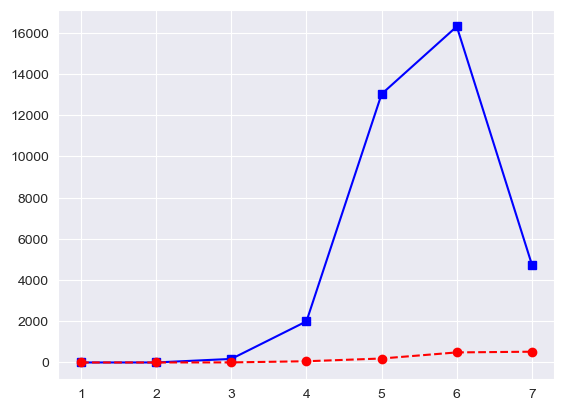

In [76]:
plot_graph(graph_df.new_cases, graph_df.new_deaths)